## Perceptron as a linear classifier Unit

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs, make_moons

In [42]:
# X,Y = make_blobs(n_samples=500,
#     n_features=2,
#     centers=2,
#     cluster_std=1.0,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,)

X,Y = make_moons(n_samples=1000, shuffle=True, noise=0.2 , random_state=None)

In [43]:
print(X.shape, Y.shape)

(1000, 2) (1000,)


In [44]:
print(Y[:5])

[1 1 0 1 0]


In [45]:
print(X[:5])

[[ 1.98586396  0.25513671]
 [ 1.362881   -0.37681606]
 [-0.01499173  1.09642167]
 [ 1.83154853 -0.48751922]
 [-0.60850175  0.42762652]]


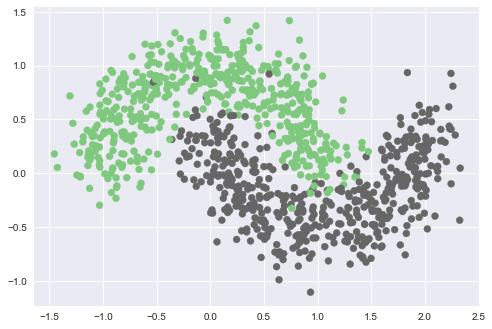

In [46]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Model and Helper Functions

In [47]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))


In [48]:
sigmoid(5)

0.9933071490757153

## Implement Perceptron Learning Algorithm

In [49]:
def predict(X, weights):
    """ X -> (m x (n+1)) matrix, w - ((n+1)x1)>"""
    z = np.dot(X, weights)
    predictions  = sigmoid(z)
    return predictions


def loss (X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_-Y)
    
    m = X.shape[0]
    
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate = 0.5, maxEpochs = 100):
    #Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    # Init weights as 0
    weights = np.zeros(X.shape[1]) #n+1 entries
    
    #Iterate over all epochs and make update
    
    for epoch in range(maxEpochs):
         weights  = update(X,Y,weights,learning_rate)            
        
        
         if epoch%10 == 0:
                
                l = loss(X,Y,weights)
                
                print("Epoch %d Loss %.4f"%(epoch,l))
                
                
    return weights
                
    
    
    

In [50]:
weights = train(X,Y,learning_rate=0.6, maxEpochs = 1000)

Epoch 0 Loss 0.6386
Epoch 10 Loss 0.4370
Epoch 20 Loss 0.3848
Epoch 30 Loss 0.3607
Epoch 40 Loss 0.3464
Epoch 50 Loss 0.3368
Epoch 60 Loss 0.3298
Epoch 70 Loss 0.3245
Epoch 80 Loss 0.3204
Epoch 90 Loss 0.3171
Epoch 100 Loss 0.3144
Epoch 110 Loss 0.3122
Epoch 120 Loss 0.3103
Epoch 130 Loss 0.3088
Epoch 140 Loss 0.3076
Epoch 150 Loss 0.3065
Epoch 160 Loss 0.3056
Epoch 170 Loss 0.3048
Epoch 180 Loss 0.3042
Epoch 190 Loss 0.3036
Epoch 200 Loss 0.3031
Epoch 210 Loss 0.3027
Epoch 220 Loss 0.3023
Epoch 230 Loss 0.3020
Epoch 240 Loss 0.3017
Epoch 250 Loss 0.3015
Epoch 260 Loss 0.3013
Epoch 270 Loss 0.3011
Epoch 280 Loss 0.3009
Epoch 290 Loss 0.3008
Epoch 300 Loss 0.3007
Epoch 310 Loss 0.3005
Epoch 320 Loss 0.3004
Epoch 330 Loss 0.3004
Epoch 340 Loss 0.3003
Epoch 350 Loss 0.3002
Epoch 360 Loss 0.3002
Epoch 370 Loss 0.3001
Epoch 380 Loss 0.3001
Epoch 390 Loss 0.3000
Epoch 400 Loss 0.3000
Epoch 410 Loss 0.2999
Epoch 420 Loss 0.2999
Epoch 430 Loss 0.2999
Epoch 440 Loss 0.2999
Epoch 450 Loss 0.2998

In [51]:
print(weights)

[ 0.48197722  1.24713362 -4.66867743]


## Perceptron Implementation Part 2

In [52]:
 def getPredictions(X_Test, weights, labels=True):
        if X_Test.shape[1] != weights.shape[0]:
        
            ones = np.ones((X_Test.shape[0],1))
            X_Test = np.hstack((ones,X_Test))
            
        probs = predict(X_Test, weights)
        
        if not labels:
            return probs
        else:
            labels = np.zeros(probs.shape)
            labels[probs>=0.5] = 1
        
        return labels
        
    

In [56]:
x1 = np.linspace(-5,5,10)
print(x1)

x2 = -(weights[0] + weights[1]*x1)/weights[2]

print(x2)

[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]
[-1.23240274 -0.93559406 -0.63878537 -0.34197668 -0.04516799  0.25164069
  0.54844938  0.84525807  1.14206676  1.43887544]


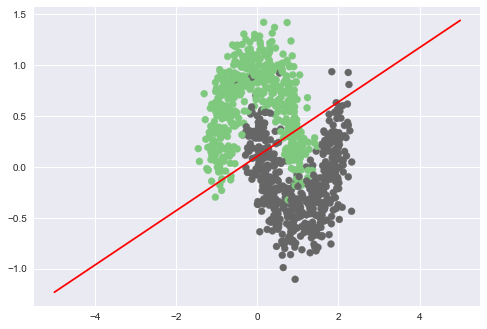

In [57]:
plt.scatter(X[:,0],X[:,1],c=Y, cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [58]:
Y_ = getPredictions(X,weights,labels = True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

0.863


### Multilayered Perceptron(MLP)

In [4]:
input_size = 2
layers = [4,3]
output_size = 2


In [16]:
def softmax(a):
    
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans
    

In [19]:
a = np.array([[10, 20],
            [20, 50]])

a_ = softmax(a)
print(a_)

[[4.53978687e-05 9.99954602e-01]
 [9.35762297e-14 1.00000000e+00]]


In [ ]:
class NueralNetwork:
    def __init__(self, input_size, layers, output_size) :
        
        np.random.seed(0)
        
        model = {}
        
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0])
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2']= np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3']= np.zeros((1,output_size))
                               
        self.model = model
                               
                               
    def forward(self,x):
            
            W1,W2,W3 = self.model['W1'], self.model['W2'], self.model[' W3']                               
            b1, b2, b3 = self.model['b1'], self.model['b2'], self.model[' b3']
                               
            z1 = np.dot(x,W1) + b1
            a1 = np.tanh(z1)
            
                               
            z2 = np.dot(a1,W2) + b2
            a2 = np.tanh(z2)
                               
            z3 = np.dot(a2,W3) + b3
            y_ = np.softmax(z3)
            
        
                               
                               
        
    
    
    
    
    
    
    
    
    
    